In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython import display

In [10]:
relu_net = torch.nn.Sequential(nn.Linear(1,3),
                              nn.ReLU(),
                                nn.Linear(3,4),
                              nn.ReLU(),
                              nn.Linear(4,1))

In [11]:
function = lambda x: np.sin(x)

In [4]:
value_low = -4
value_high = 4

In [12]:
optimizer = torch.optim.Adam(relu_net.parameters(), lr=0.01)

In [13]:
loss = nn.MSELoss()

In [14]:
def train_loop(train_steps):
    for _ in range(train_steps):
        batch = np.random.rand(256,1) * (value_high-value_low) + value_low
        targets = function(batch)
        batch = torch.tensor(batch, dtype=torch.float32)
        targets = torch.tensor(targets, dtype=torch.float32)
        predictions = relu_net(batch)
        
        
        loss_value = loss(targets, predictions)
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

In [15]:
num_steps = 1000
x = np.arange(value_low, value_high, (value_high-value_low)/num_steps)
x_torch = torch.tensor(x.reshape(-1,1), dtype=torch.float32)

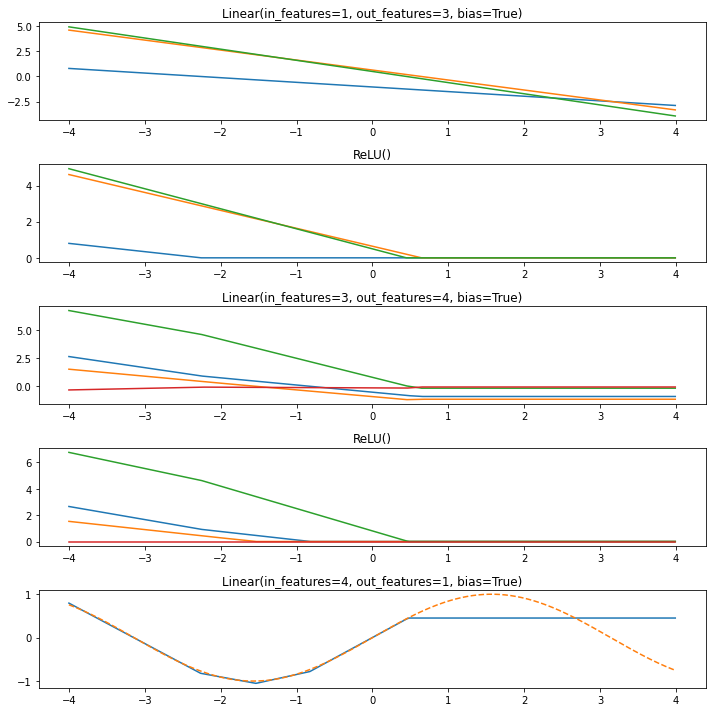

In [16]:
for _ in range(100):
    train_loop(100)
    y = relu_net(x_torch).detach().numpy().squeeze()
    
    fig, axs = plt.subplots(len(list(relu_net.modules())[0]),1, figsize=(10,10))
    
    temp_tensor = x_torch
    for i, module in enumerate(list(relu_net.modules())[0]):
        temp_tensor = module(temp_tensor)
        temp_numpy = temp_tensor.detach().numpy().squeeze()
        axs[i].plot(x, temp_numpy)
        axs[i].set_title(str(module))
        
    axs[-1].plot(x, function(x), linestyle="dashed")
     
    plt.tight_layout()
    plt.show()
    display.clear_output(wait=True)